In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from census import Census
# from us import states
import censusdata
from config import census_key

In [ ]:
#Home Values DF set-up (4 files)


In [3]:
# Create an instance of the Census library
c = Census(
    census_key    
)

In [4]:
# Geographical codes for states to access census data
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)
states
# Geographical codes for Counties in Michigan to access census data
counties = censusdata.geographies(censusdata.censusgeo([('state', '26'), ('county', '*')]), 'acs5', 2015)
# print(counties)

In [5]:
print(censusdata.geographies(censusdata.censusgeo([('state', '26'), ('county', '081')]), 'acs5', 2015))
print(censusdata.geographies(censusdata.censusgeo([('state', '26'), ('county', '121')]), 'acs5', 2015))
print(censusdata.geographies(censusdata.censusgeo([('state', '26'), ('county', '125')]), 'acs5', 2015))
print(censusdata.geographies(censusdata.censusgeo([('state', '26'), ('county', '145')]), 'acs5', 2015))

{'Kent County, Michigan': censusgeo((('state', '26'), ('county', '081')))}
{'Muskegon County, Michigan': censusgeo((('state', '26'), ('county', '121')))}
{'Oakland County, Michigan': censusgeo((('state', '26'), ('county', '125')))}
{'Saginaw County, Michigan': censusgeo((('state', '26'), ('county', '145')))}


In [7]:
# MEDIAN HOUSEHOLD INCOME FOR KENT, OAKLAND, MUSKEGON, SAGINAW COUNTIES

# Median household income variable from CensusAPI
vars = ["B19013_001E"]

# Median Household income Kent county
median_kent = []

for y in range(2012,2021+1):
    # '26' is Michigan, '081' is kent county
    kent = c.acs5.state_county(vars, "26", "081",year=y)
    kent_med_inc= pd.DataFrame(kent)
    kent_med_inc['year'] = y
    median_kent.append(kent_med_inc)

median_income_kent  = pd.concat(median_kent,axis=0)
median_income_kent = median_income_kent.rename(columns={"B19013_001E":"Median Household Income_K",
                                                        
                                                        "county":"Kent county"})
# print(median_income_kent)

# Median Household income Oakland county
median_oak=[]
for y in range(2012,2021+1):
    # '26' is Michigan, '125' is oakland county
    oak = c.acs5.state_county(vars, "26", "125",year=y)
    oak_med_inc= pd.DataFrame(oak)
    oak_med_inc['year'] = y
    median_oak.append(oak_med_inc)

median_income_oak  = pd.concat(median_oak,axis=0)
median_income_oak = median_income_oak.rename(columns={"B19013_001E":"Median Household Income_O",
                                
                                                      "county":"Oakland county"})
# print(median_income_oak)


median_household_income1 = pd.merge(median_income_kent,median_income_oak,on=['state','year'])
median_household_income1

# # Median household income for Saginaw county
median_sag = []

for y in range(2012,2021+1):
    # '26' is Michigan, '145' is saginaw county
    sag = c.acs5.state_county(vars, '26', "145",year=y)
    sag_med_inc= pd.DataFrame(sag)
    sag_med_inc['year'] = y
    median_sag.append(sag_med_inc)

median_income_saginaw  = pd.concat(median_sag,axis=0)
median_income_saginaw = median_income_saginaw.rename(columns={"B19013_001E":"Median Household Income_S","county":"Saginaw county"
                                                             })
                                                             
# print(median_income_saginaw)

# # Median Household income Muskegon
median_musk = []
for y in range(2012,2021+1):
    # '26' is Michigan, '121' is muskegon county
    musk = c.acs5.state_county(vars, '26', "121",year=y)
    musk_med_inc= pd.DataFrame(musk)
    musk_med_inc['year'] = y
    median_musk.append(musk_med_inc)

median_income_muskegon  = pd.concat(median_musk,axis=0)
median_income_muskegon = median_income_muskegon.rename(columns={"B19013_001E":"Median Household Income_M","county":"Muskegon county"
                                                               })

median_household_income2 = pd.merge(median_income_saginaw,median_income_muskegon,on=['state','year'])
median_household_income2

# Merging to a single DataFrame
median_household_income = pd.merge(median_household_income1,median_household_income2,on=['state','year'])
median_household_income = median_household_income[["state","year","Kent county","Median Household Income_K","Oakland county",
                                                  "Median Household Income_O","Saginaw county","Median Household Income_S","Muskegon county","Median Household Income_M"]]
median_household_income=median_household_income.sort_values(by=['year'],ascending=False,ignore_index=True)
median_household_income


,state,year,Kent county,Median Household Income_K,Oakland county,Median Household Income_O,Saginaw county,Median Household Income_S,Muskegon county,Median Household Income_M
0,26,2021,081,69786.0,125,86275.0,145,52749.0,121,57047.0
1,26,2020,081,65722.0,125,81587.0,145,49565.0,121,53478.0
2,26,2019,081,63053.0,125,79698.0,145,48000.0,121,50854.0
3,26,2018,081,60351.0,125,76387.0,145,46919.0,121,48329.0
4,26,2017,081,57302.0,125,73369.0,145,45034.0,121,46077.0
5,26,2016,081,54673.0,125,69850.0,145,43712.0,121,43920.0
6,26,2015,081,53063.0,125,67465.0,145,43042.0,121,42829.0
7,26,2014,081,52716.0,125,66436.0,145,43566.0,121,41842.0
8,26,2013,081,51667.0,125,65594.0,145,42331.0,121,40979.0
9,26,2012,081,51030.0,125,65637.0,145,42828.0,121,40843.0


In [8]:
# TOTAL POPULATION 
# Total Population variable from CensusAPI
vars = ["B01003_001E"]

# Total population in Saginaw county
total_saginaw = []

for y in range(2012,2021+1):
    # '26' is Michigan, '145' is saginaw county
    saginaw_p = c.acs5.state_county(vars, '26', "145",year=y)
    saginaw_pop= pd.DataFrame(saginaw_p)
    saginaw_pop['year'] = y
    total_saginaw.append(saginaw_pop)

total_population_saginaw  = pd.concat(total_saginaw,axis=0)
total_population_saginaw= total_population_saginaw.rename(columns={"B01003_001E":"Total Population_S",
                                                                   "county":"Saginaw county"})
# print(total_population_saginaw)

# Total population Muskegon
total_muskegon = []

for y in range(2012,2021+1):
    # '26' is Michigan, '121' is muskegon county
    muskegon_p = c.acs5.state_county(vars, '26', "121",year=y)
    muskegon_pop= pd.DataFrame(muskegon_p)
    muskegon_pop['year'] = y
    total_muskegon.append(muskegon_pop)

total_population_muskegon  = pd.concat(total_muskegon,axis=0)
total_population_muskegon= total_population_muskegon.rename(columns={"B01003_001E":"Total Population_M",
                                                                      "county":"Muskegon county"})
                                                                     
# print(total_population_muskegon)

total_population1 = pd.merge(total_population_saginaw,total_population_muskegon,on=['state','year'])
# total_population1

# Total population for Kent county

total_kent=[]

for y in range(2012,2021+1):
    kent_p = c.acs5.state_county(vars, '26', "081",year=y)
    kent_pop= pd.DataFrame(kent_p)
    kent_pop['year'] = y
    total_kent.append(kent_pop)

total_population_kent  = pd.concat(total_kent,axis=0)
total_population_kent= total_population_kent.rename(columns={"B01003_001E":"Total Population_K",
                                                              "county":"Kent county"})
                                                                
# print(total_population_kent)

# Total population for Oakland county

total_oak=[]

for y in range(2012,2021+1):
    oak_p = c.acs5.state_county(vars, '26', "125",year=y)
    oak_pop= pd.DataFrame(oak_p)
    oak_pop['year'] = y
    total_oak.append(oak_pop)

total_population_oak  = pd.concat(total_oak,axis=0)
total_population_oak= total_population_oak.rename(columns={"B01003_001E":"Total Population_O",
                                                            "county":"Oakland county"})
                                                                
# print(total_population_oak)
total_population2 = pd.merge(total_population_kent,total_population_oak,on=['state','year'])
# Merging into a single DataFrame
total_population = pd.merge(total_population1,total_population2,on=['state','year'])
total_population=total_population[["state","year","Saginaw county","Total Population_S","Muskegon county","Total Population_M",
                                   "Kent county","Total Population_K","Oakland county","Total Population_O"]]
total_population=total_population.sort_values(by=['year'],ascending=False,ignore_index=True)
total_population

,state,year,Saginaw county,Total Population_S,Muskegon county,Total Population_M,Kent county,Total Population_K,Oakland county,Total Population_O
0,26,2021,145,190540.0,121,175633.0,081,654958.0,125,1271983.0
1,26,2020,145,191166.0,121,173679.0,081,652617.0,125,1255340.0
2,26,2019,145,191821.0,121,173297.0,081,648121.0,125,1253185.0
3,26,2018,145,192778.0,121,173043.0,081,643140.0,125,1250843.0
4,26,2017,145,193803.0,121,172707.0,081,636376.0,125,1241860.0
5,26,2016,145,195201.0,121,172148.0,081,629352.0,125,1235215.0
6,26,2015,145,196479.0,121,171483.0,081,622590.0,125,1229503.0
7,26,2014,145,197727.0,121,171328.0,081,615381.0,125,1220798.0
8,26,2013,145,198841.0,121,171153.0,081,609544.0,125,1213406.0
9,26,2012,145,200017.0,121,171755.0,081,605244.0,125,1207097.0


In [14]:
#Vital Statistics DF set-up (4 files)
# Infant Mortality Rate
# Creating Paths
infant_kentcsv = "datasets/KentVitalStatistics.csv"
infant_oaklandcsv = "datasets/OaklandVitalStatistics.csv"
infant_muskegoncsv = "datasets/MuskegonVitalStatistics.csv"
infant_saginawcsv = "datasets/SaginawVitalStatistics.csv"

# Read with Pandas
infant_kent_df = pd.read_csv(infant_kentcsv)
infant_oakland_df = pd.read_csv(infant_oaklandcsv)
infant_muskegon_df = pd.read_csv(infant_muskegoncsv)
infant_saginaw_df = pd.read_csv(infant_saginawcsv)
# infant_kent_df.head()
# infant_muskegon_df.head()
# infant_oakland_df.head()
# infant_saginaw_df.head()

# Merging DataFrame
combined_df = pd.merge(infant_kent_df ,infant_muskegon_df,
                                  how='left', on=['State','Year'])
  
combined_df = combined_df.rename(columns={"County_x":"County1",
                                          "Infant Deaths_x":"Infant_Deaths_Kent",
                                          "Live Births_x":"Live_Births_Kent",
                                          "County_y":"County2",
                                          "Infant Deaths_y":"Infant_Deaths_Muskegon",
                                          "Live Births_y":"Live_Births_Muskegon",
                                                        })
combined_df 
combined_df = combined_df[["Year","State","County1","Infant_Deaths_Kent","Live_Births_Kent",
                             "County2","Infant_Deaths_Muskegon","Live_Births_Muskegon"]]
combined_df 

combined_df1 = pd.merge(infant_oakland_df ,infant_saginaw_df ,
                                    how='left', on=['State','Year'])
combined_df1 
combined_df1 = combined_df1.rename(columns={"County_x":"County3",
                                          "Infant Deaths_x":"Infant_Deaths_Oakland",
                                          "Live Births_x":"Live_Births_Oakland",
                                          "County_y":"County4",
                                          "Infant Deaths_y":"Infant_Deaths_Saginaw",
                                          "Live Births_y":"Live_Births_Saginaw",
                                                        })
combined_df1
infant_mortality=pd.merge(combined_df,combined_df1,how='left', on=['State','Year'])
infant_mortality


,Year,State,County1,Infant_Deaths_Kent,Live_Births_Kent,County2,Infant_Deaths_Muskegon,Live_Births_Muskegon,County3,Infant_Deaths_Oakland,Live_Births_Oakland,County4,Infant_Deaths_Saginaw,Live_Births_Saginaw
0,2022,Michigan,Kent,41,7898,Muskegon,12,1857,Oakland,42,12402,Saginaw,17,1904
1,2021,Michigan,Kent,40,8203,Muskegon,14,1868,Oakland,62,12879,Saginaw,10,2018
2,2020,Michigan,Kent,55,8180,Muskegon,12,1883,Oakland,62,12305,Saginaw,26,2002
3,2019,Michigan,Kent,51,8176,Muskegon,9,1954,Oakland,53,12899,Saginaw,18,2118
4,2018,Michigan,Kent,41,8613,Muskegon,12,2051,Oakland,79,13152,Saginaw,19,2192
5,2017,Michigan,Kent,46,8684,Muskegon,15,2125,Oakland,71,13184,Saginaw,10,2248
6,2016,Michigan,Kent,56,8795,Muskegon,20,2132,Oakland,72,13627,Saginaw,27,2192
7,2015,Michigan,Kent,56,8823,Muskegon,18,2082,Oakland,71,13547,Saginaw,19,2254
8,2014,Michigan,Kent,52,8886,Muskegon,15,2084,Oakland,83,13454,Saginaw,21,2259
9,2013,Michigan,Kent,39,8832,Muskegon,18,2130,Oakland,90,13445,Saginaw,19,2289


In [15]:
# Calculating Infant mortality rate
infant_mortality["Kent_mortalityrate"]= np.round(((infant_mortality["Infant_Deaths_Kent"]/infant_mortality["Live_Births_Kent"])*1000),decimals=2)
infant_mortality["Muskegon_mortalityrate"]= np.round(((infant_mortality["Infant_Deaths_Muskegon"]/infant_mortality["Live_Births_Muskegon"])*1000),decimals=2)
infant_mortality["Oakland_mortalityrate"]= np.round(((infant_mortality["Infant_Deaths_Oakland"]/infant_mortality["Live_Births_Oakland"])*1000),decimals=2)
infant_mortality["Saginaw_mortalityrate"]= np.round(((infant_mortality["Infant_Deaths_Saginaw"]/infant_mortality["Live_Births_Saginaw"])*1000),decimals=2)

# Creating New dataframe
infant_mortality_df = infant_mortality[["Year","County1","Kent_mortalityrate","County2","Muskegon_mortalityrate",
                                        "County3","Oakland_mortalityrate","County4","Saginaw_mortalityrate"]]
infant_mortality_df

,Year,County1,Kent_mortalityrate,County2,Muskegon_mortalityrate,County3,Oakland_mortalityrate,County4,Saginaw_mortalityrate
0,2022,Kent,5.19,Muskegon,6.46,Oakland,3.39,Saginaw,8.93
1,2021,Kent,4.88,Muskegon,7.49,Oakland,4.81,Saginaw,4.96
2,2020,Kent,6.72,Muskegon,6.37,Oakland,5.04,Saginaw,12.99
3,2019,Kent,6.24,Muskegon,4.61,Oakland,4.11,Saginaw,8.50
4,2018,Kent,4.76,Muskegon,5.85,Oakland,6.01,Saginaw,8.67
5,2017,Kent,5.30,Muskegon,7.06,Oakland,5.39,Saginaw,4.45
6,2016,Kent,6.37,Muskegon,9.38,Oakland,5.28,Saginaw,12.32
7,2015,Kent,6.35,Muskegon,8.65,Oakland,5.24,Saginaw,8.43
8,2014,Kent,5.85,Muskegon,7.20,Oakland,6.17,Saginaw,9.30
9,2013,Kent,4.42,Muskegon,8.45,Oakland,6.69,Saginaw,8.30


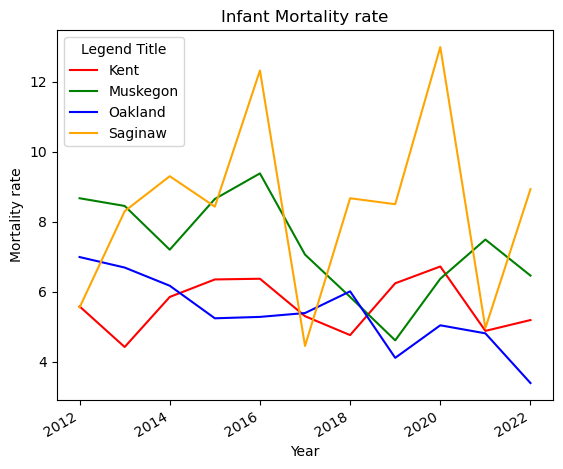

In [8]:
# plotting the time series of infant mortality rate in Kent county 
plt.plot(infant_mortality_df["Year"], infant_mortality_df["Kent_mortalityrate"],color='red')
 
# plotting the time series of infant mortality rate in Muskegon county
plt.plot(infant_mortality_df["Year"], infant_mortality_df["Muskegon_mortalityrate"], color='green')

# plotting the time series of infant mortality rate in Oakland county
plt.plot(infant_mortality_df["Year"], infant_mortality_df["Oakland_mortalityrate"], color='blue')

# plotting the time series of infant mortality rate in Saginaw county
plt.plot(infant_mortality_df["Year"], infant_mortality_df["Saginaw_mortalityrate"], color='orange')
 
# Giving title to the graph
plt.title('Infant Mortality rate')
 
# rotating the x-axis tick labels at 30degree 
# towards right
plt.xticks(rotation=30, ha='right')
 
# Giving x and y label to the graph
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.legend(['Kent', 'Muskegon', 'Oakland', 'Saginaw'], loc='upper left', title='Legend Title')
plt.show()

In [12]:
# POVERTY RATE 
pov_kentcsv = "Datasets/Poverty_rate/Kent_poverty_rate.csv"
pov_oaklandcsv = "Datasets/Poverty_rate/Oakland_poverty_rate.csv"
pov_muskegoncsv = "Datasets/Poverty_rate/Muskegon_poverty_rate.csv"
pov_saginawcsv = "Datasets/Poverty_rate/Saginaw_poverty_rate.csv"

# # Read with Pandas
pov_kent_df = pd.read_csv(pov_kentcsv)
pov_oakland_df = pd.read_csv(pov_oaklandcsv)
pov_muskegon_df = pd.read_csv(pov_muskegoncsv)
pov_saginaw_df = pd.read_csv(pov_saginawcsv)
# pov_kent_df.head()
# pov_muskegon_df.head()
# pov_oakland_df.head()
# pov_saginaw_df.head()

# Merging DataFrame
combined_df = pd.merge(pov_kent_df ,pov_muskegon_df,
                        how='left', on=['State','Year'])
  
combined_df = combined_df.rename(columns={"ID_x":"Kent ID",
                                          "Name_x":"Kent County",
                                          "Poverty Universe_x":"Poverty Universe_K",
                                          "Number in Poverty_x":"Number in Poverty_K",
                                          "Percent in Poverty_x":"Poverty Percent_Kent",
                                          "ID_y":"Muskegon ID",
                                          "Name_y":"Muskegon County",
                                          "Poverty Universe_y":"Poverty Universe_M",
                                          "Number in Poverty_y":"Number in Poverty_M",
                                          "Percent in Poverty_y":"Poverty Percent_Muskegon",
                                                        })
# combined_df 
combined_df22 = combined_df[["State","Year","Kent County","Poverty Percent_Kent",
                             "Muskegon County","Poverty Percent_Muskegon"]]
# # # combined_df22 

combined_df1 = pd.merge(pov_oakland_df,pov_saginaw_df,
                         how='left', on=['State','Year'])
# combined_df1
combined_df1 = combined_df1.rename(columns={"ID_x":"Oakland ID",
                                          "Name_x":"Oakland County",
                                          "Poverty Universe_x":"Poverty Universe_O",
                                          "Number in Poverty_x":"Number in Poverty_O",
                                          "Percent in Poverty_x":"Poverty Percent_Oakland",
                                          "ID_y":"Saginaw ID",
                                          "Name_y":"Saginaw County",
                                          "Poverty Universe_y":"Poverty Universe_S",
                                          "Number in Poverty_y":"Number in Poverty_S",
                                          "Percent in Poverty_y":"Poverty Percent_Saginaw",
                                                        })
# combined_df1 
combined_df11 = combined_df1[["Year","State","Oakland County","Poverty Percent_Oakland",
                              "Saginaw County","Poverty Percent_Saginaw"]]
combined_df11
poverty_rate=pd.merge(combined_df22,combined_df11,how='left', on=['State','Year'])
# poverty_rate
poverty_rate1=poverty_rate.sort_values(by=['Year'],ascending=False,ignore_index=True)
poverty_rate1

,State,Year,Kent County,Poverty Percent_Kent,Muskegon County,Poverty Percent_Muskegon,Oakland County,Poverty Percent_Oakland,Saginaw County,Poverty Percent_Saginaw
0,Michigan,2022,Kent County,10.7,Muskegon County,14.5,Oakland County,8.2,Saginaw County,18.1
1,Michigan,2021,Kent County,9.9,Muskegon County,14.4,Oakland County,7.8,Saginaw County,20.7
2,Michigan,2020,Kent County,11.1,Muskegon County,12.3,Oakland County,7.8,Saginaw County,15.9
3,Michigan,2019,Kent County,11.2,Muskegon County,13.5,Oakland County,7.8,Saginaw County,18.6
4,Michigan,2018,Kent County,11.3,Muskegon County,15.7,Oakland County,8.2,Saginaw County,17.0
5,Michigan,2017,Kent County,10.4,Muskegon County,15.2,Oakland County,7.8,Saginaw County,17.5
6,Michigan,2016,Kent County,12.1,Muskegon County,18.8,Oakland County,8.7,Saginaw County,17.8
7,Michigan,2015,Kent County,14.5,Muskegon County,16.1,Oakland County,9.3,Saginaw County,18.6
8,Michigan,2014,Kent County,15.3,Muskegon County,20.0,Oakland County,10.0,Saginaw County,17.4
9,Michigan,2013,Kent County,14.8,Muskegon County,20.4,Oakland County,10.2,Saginaw County,18.7


The r-value is : 0.7464761741933352
R squared: 0.5572266786383185


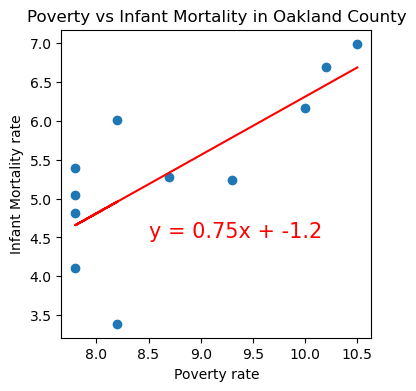

The r-value is : 0.6806104066650707
R squared: 0.46323052566079287


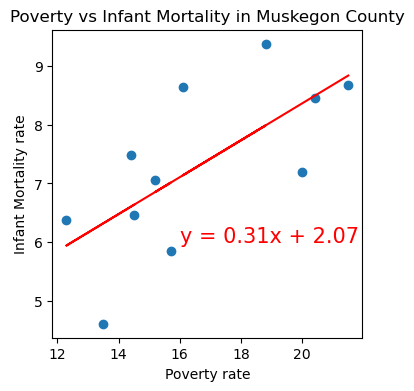

In [18]:
# REGRESSION PLOT BETWEEN POVERTY AND INFANT MORTALITY
def linear_reg_plot(x_values,y_values,coordinates,titles):
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   regress_values = x_values * slope + intercept
    
   line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#    print(line_eq)

   # Plot scatter plot
   plt.scatter(x_values,y_values)
   plt.rcParams["figure.figsize"] = (4,4)
    
# Plot regression line
   plt.plot(x_values,regress_values,"r-")
  
   
# Label plot
   plt.xlabel('Poverty rate')
   plt.ylabel('Infant Mortality rate')
   plt.annotate(line_eq,coordinates,fontsize=15,color="red")
   plt.title(titles)

# Print r square value
   print(f"The r-value is : {rvalue}")
   print(f"R squared: {rvalue**2}")
   
# Show plot
   plt.show()
   
   
# Oakland county
x_values =poverty_rate1["Poverty Percent_Oakland"] 
y_values = infant_mortality_df["Oakland_mortalityrate"]

linear_reg_plot(x_values,y_values,(8.5,4.5),"Poverty vs Infant Mortality in Oakland County")


# Muskegon county
x_values =poverty_rate1["Poverty Percent_Muskegon"] 
y_values = infant_mortality_df["Muskegon_mortalityrate"]

linear_reg_plot(x_values,y_values,(16,6),"Poverty vs Infant Mortality in Muskegon County")



In [5]:
#Median Rent Over Time DF set-up (1 file)
# Creating Paths
rent_df = pd.read_csv("datasets/Median Rent Over Time (2011 - 2023).csv")
rent_df.head()

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kent County,$720,$737,$745,$762,$930.28,"$1,009.35","$1,067.28","$1,126.82","$1,177.61","$1,224.31","$1,347.48","$1,519.79","$1,533.41"
1,Muskegon County,$642,$656,$663,$669,$673,$692,$717,$747,$760,$780,$951.01,"$1,063.26","$1,067.04"
2,Oakland County,$894,$909,$919,$934,"$1,095.49","$1,131.06","$1,192.48","$1,227.14","$1,272.89","$1,287","$1,439.53","$1,555.36","$1,547.75"
3,Saginaw County,$697,$700,$699,$710,$705,$709,$731,$760,$780,$783,$813.3,$892.66,$927.6


In [6]:
rent_df.columns

Index(['Unnamed: 0', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [7]:
rent_df.rename(columns = {'Unnamed: 0':'Counties'}, inplace = True)
rent_df.head()

,Counties,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kent County,$720,$737,$745,$762,$930.28,"$1,009.35","$1,067.28","$1,126.82","$1,177.61","$1,224.31","$1,347.48","$1,519.79","$1,533.41"
1,Muskegon County,$642,$656,$663,$669,$673,$692,$717,$747,$760,$780,$951.01,"$1,063.26","$1,067.04"
2,Oakland County,$894,$909,$919,$934,"$1,095.49","$1,131.06","$1,192.48","$1,227.14","$1,272.89","$1,287","$1,439.53","$1,555.36","$1,547.75"
3,Saginaw County,$697,$700,$699,$710,$705,$709,$731,$760,$780,$783,$813.3,$892.66,$927.6


In [8]:
rent_df.rename(columns = {'Unnamed: 0':'Counties'}, inplace = True)
rent_df.head()

,Counties,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kent County,$720,$737,$745,$762,$930.28,"$1,009.35","$1,067.28","$1,126.82","$1,177.61","$1,224.31","$1,347.48","$1,519.79","$1,533.41"
1,Muskegon County,$642,$656,$663,$669,$673,$692,$717,$747,$760,$780,$951.01,"$1,063.26","$1,067.04"
2,Oakland County,$894,$909,$919,$934,"$1,095.49","$1,131.06","$1,192.48","$1,227.14","$1,272.89","$1,287","$1,439.53","$1,555.36","$1,547.75"
3,Saginaw County,$697,$700,$699,$710,$705,$709,$731,$760,$780,$783,$813.3,$892.66,$927.6


In [9]:
# Loop through each year column
for year in range(2011, 2024):
    # Get the column name for the current year
    year_column = str(year)
    
    # Remove the "$" symbol from the values in the year column
    rent_df[year_column] = rent_df[year_column].str.replace('$', '')
    rent_df[year_column] = rent_df[year_column].str.replace(',', '')

    # Convert the year column to numeric
    rent_df[year_column] = pd.to_numeric(rent_df[year_column])

rent_df.head()

,Counties,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kent County,720,737,745,762,930.28,1009.35,1067.28,1126.82,1177.61,1224.31,1347.48,1519.79,1533.41
1,Muskegon County,642,656,663,669,673.00,692.00,717.00,747.00,760.00,780.00,951.01,1063.26,1067.04
2,Oakland County,894,909,919,934,1095.49,1131.06,1192.48,1227.14,1272.89,1287.00,1439.53,1555.36,1547.75
3,Saginaw County,697,700,699,710,705.00,709.00,731.00,760.00,780.00,783.00,813.30,892.66,927.60


In [10]:
kentcounty = rent_df.loc[(rent_df["Counties"])== "Kent County"]
kentcounty

,Counties,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kent County,720,737,745,762,930.28,1009.35,1067.28,1126.82,1177.61,1224.31,1347.48,1519.79,1533.41


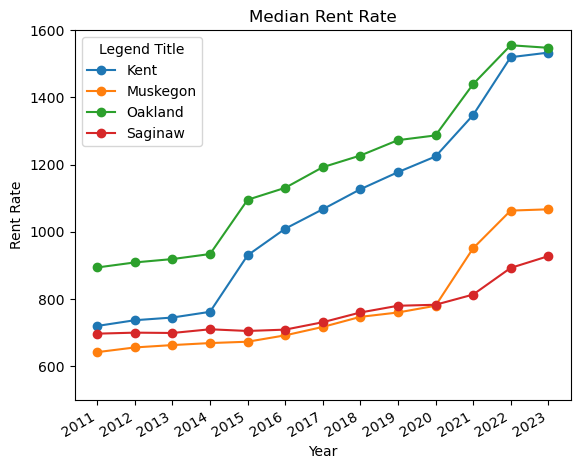

In [12]:
for index, row in rent_df.iterrows():
    # Get the name from the 'Name' column
    county = row['Counties']
    
    # Get the rates for each year
    rent_rates = row['2011':'2023']
    
    # Plot the rates as a line graph
    plt.plot(rent_rates.index, rent_rates.values,marker= "o")

# Giving title to the graph
plt.title('Median Rent Rate')
 
# rotating the x-axis tick labels at 30degree 
# towards right
plt.xticks(rotation=30, ha='right')
 
# Giving x and y label to the graph
plt.xlabel('Year')
plt.ylabel('Rent Rate')
plt.ylim(500,1600)
plt.legend(['Kent', 'Muskegon', 'Oakland', 'Saginaw'], loc='upper left', title='Legend Title')
plt.show()

In [ ]:
#Population by Race DF set-up (1 file)
